<a href="https://colab.research.google.com/github/Angelgz011/estadistica2/blob/main/eii_u2_04_22150429.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Angelgz011/estadistica2/refs/heads/main/smart_logistics_dataset.csv")
df.dropna(inplace=True)


df.drop(columns = ['Asset_ID','Timestamp'], inplace = True)
df

#Variable elegida Logistics_Delay



,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


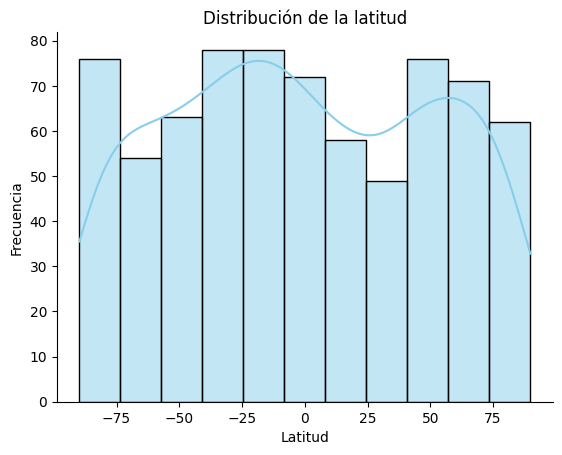

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Latitude'], kde=True, color='skyblue')
plt.xlabel('Latitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de la latitud')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()


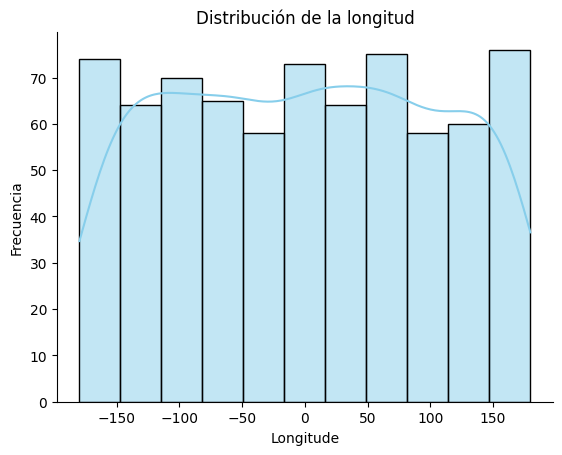

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Longitude'], kde=True, color='skyblue')
plt.xlabel('Longitude')
plt.ylabel('Frecuencia')
plt.title('Distribución de la longitud')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

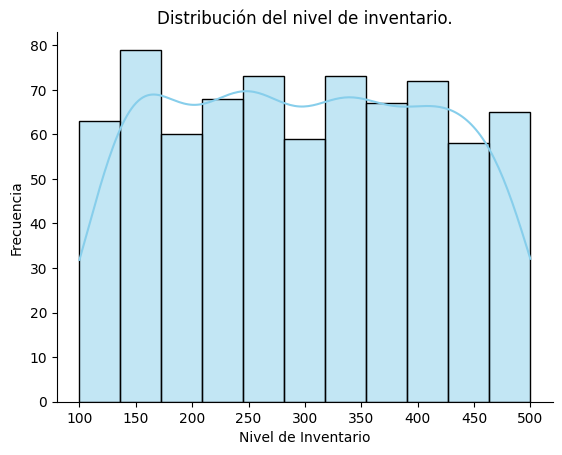

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Inventory_Level'], kde=True, color='skyblue')
plt.xlabel('Nivel de Inventario')
plt.ylabel('Frecuencia')
plt.title('Distribución del nivel de inventario.')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [74]:
 #Prueba ANOVA para Shipment_Status
import statsmodels.api as sm
import statsmodels.formula.api as smf
modelo = smf.ols('Logistics_Delay ~ C(Shipment_Status)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
#H0: No hay diferencia entre grupos.


,df,sum_sq,mean_sq,F,PR(>F)
C(Shipment_Status),2.0,73.573170,36.786585,251.839492,5.288248e-84
Residual,734.0,107.216518,0.146072,NaN,NaN


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2   meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
  Delayed  Delivered  -0.6484    0.0 -0.7277 -0.5692   True
  Delayed In Transit  -0.6786    0.0 -0.7606 -0.5965   True
Delivered In Transit  -0.0301 0.6646 -0.1123   0.052  False
-----------------------------------------------------------


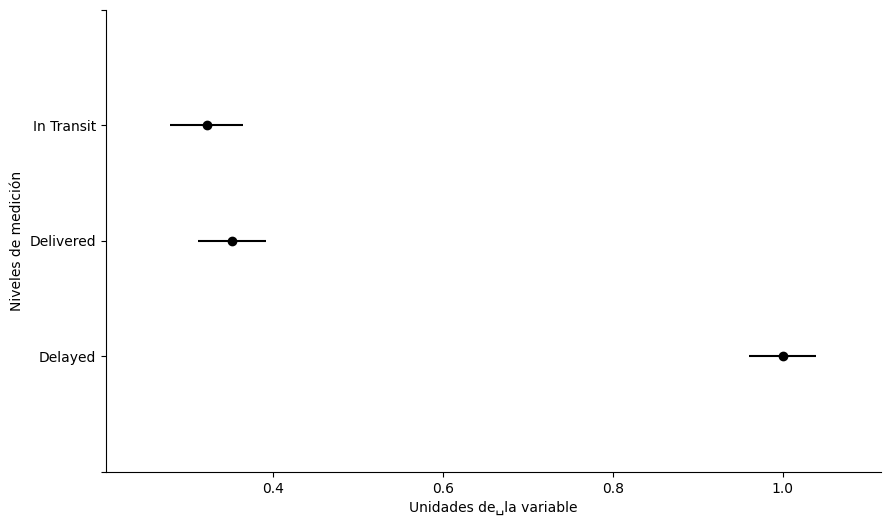

In [75]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Logistics_Delay'], groups = df['Shipment_Status'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de␣la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)


In [76]:
niveles = {'In Transit': 0, 'Delivered': 0, 'Delayed': 1}
df['Shipment_Status'] = df['Shipment_Status'].map(niveles)

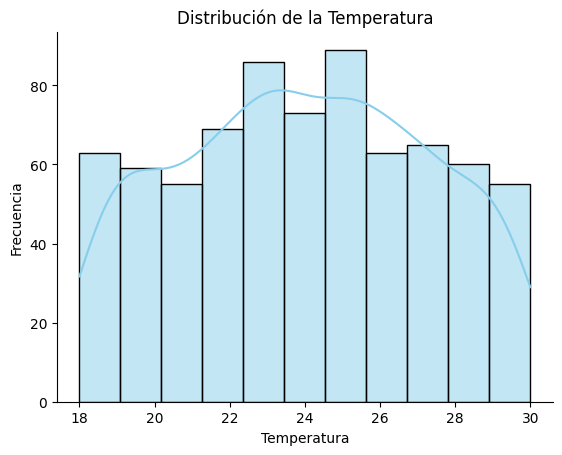

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Temperature'], kde=True, color='skyblue')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Temperatura')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

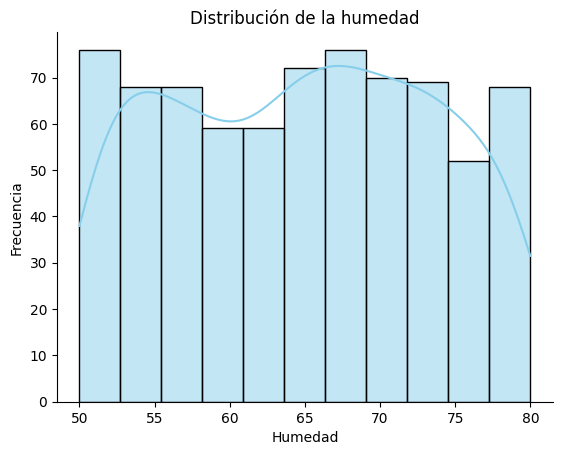

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Humidity'], kde=True, color='skyblue')
plt.xlabel('Humedad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la humedad')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [79]:
#Prueba ANOVA para Traffic_Status
import statsmodels.api as sm
import statsmodels.formula.api as smf
modelo = smf.ols('Logistics_Delay ~ C(Traffic_Status)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
#H0: No hay diferencia entre grupos.

,df,sum_sq,mean_sq,F,PR(>F)
C(Traffic_Status),2.0,68.834885,34.417442,225.648225,4.130010e-77
Residual,734.0,111.954803,0.152527,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 Clear Detour  -0.0271 0.7227 -0.1099 0.0557  False
 Clear  Heavy   0.6341    0.0  0.5514 0.7168   True
Detour  Heavy   0.6612    0.0  0.5784  0.744   True
---------------------------------------------------


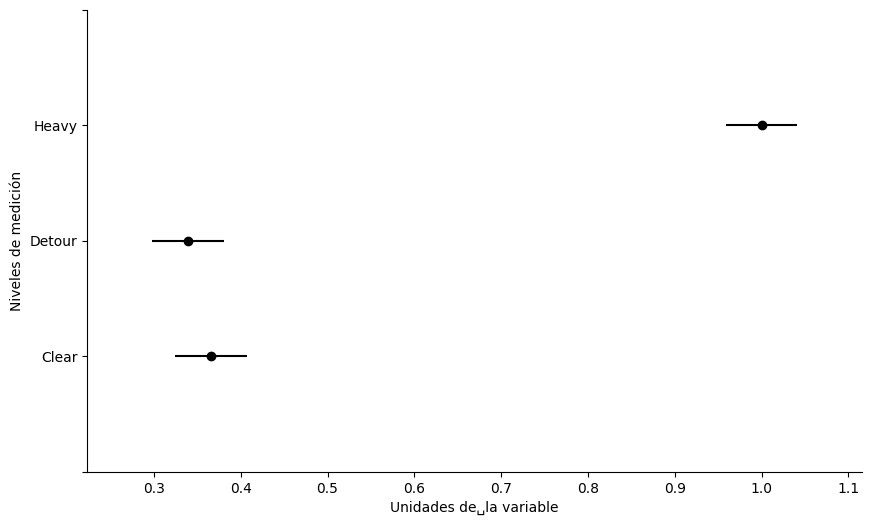

In [80]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Logistics_Delay'], groups = df['Traffic_Status'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de␣la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [81]:
niveles = {'Clear': 0, 'Detour': 0, 'Heavy': 1}
df['Traffic_Status'] = df['Traffic_Status'].map(niveles)
df

,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,0,22.5,54.3,1,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,0,25.4,52.3,1,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,0,23.3,64.2,0,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,0,21.9,57.3,0,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,0,29.7,63.6,0,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,1,21.6,62.8,0,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,0,21.6,64.1,0,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,0,26.9,70.0,1,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,0,23.7,77.9,0,56,276,7,Weather,83.7,272,0


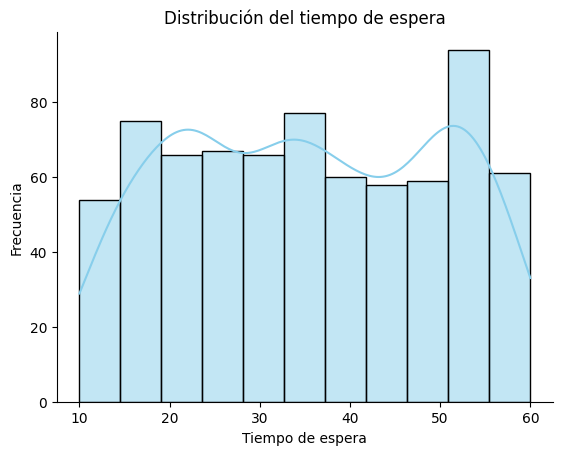

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Waiting_Time'], kde=True, color='skyblue')
plt.xlabel('Tiempo de espera')
plt.ylabel('Frecuencia')
plt.title('Distribución del tiempo de espera')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

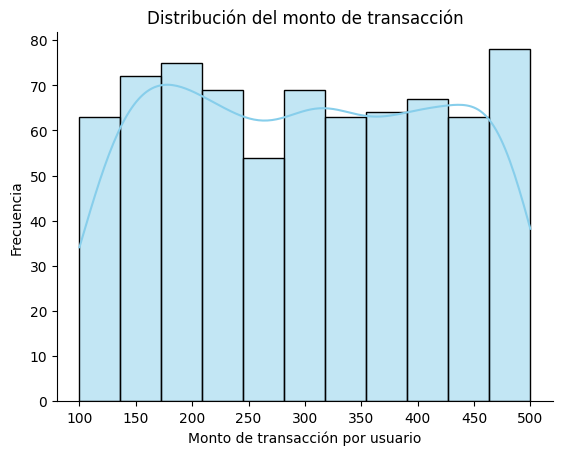

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['User_Transaction_Amount'], kde=True, color='skyblue')
plt.xlabel('Monto de transacción por usuario')
plt.ylabel('Frecuencia')
plt.title('Distribución del monto de transacción')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

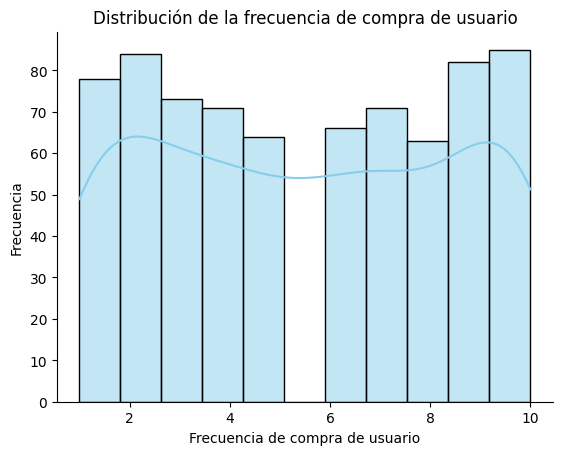

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['User_Purchase_Frequency'], kde=True, color='skyblue')
plt.xlabel('Frecuencia de compra de usuario')
plt.ylabel('Frecuencia')
plt.title('Distribución de la frecuencia de compra de usuario')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

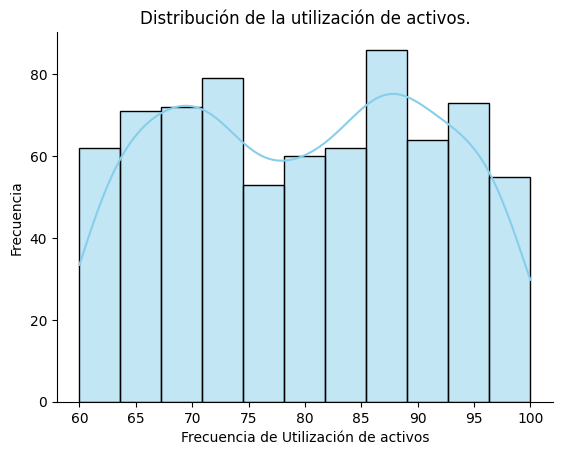

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Asset_Utilization'], kde=True, color='skyblue')
plt.xlabel('Frecuencia de Utilización de activos')
plt.ylabel('Frecuencia')
plt.title('Distribución de la utilización de activos.')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

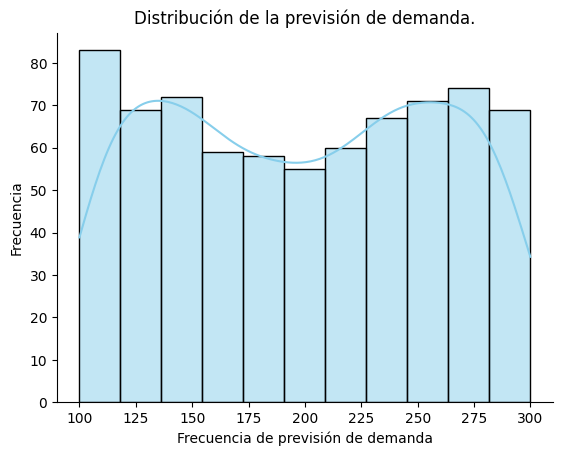

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Demand_Forecast'], kde=True, color='skyblue')
plt.xlabel('Frecuencia de previsión de demanda')
plt.ylabel('Frecuencia')
plt.title('Distribución de la previsión de demanda.')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [87]:
#Prueba ANOVA para Traffic_Status
import statsmodels.api as sm
import statsmodels.formula.api as smf
modelo = smf.ols('Logistics_Delay ~ C(Logistics_Delay_Reason)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
#H0: No hay diferencia entre grupos.

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay_Reason),2.0,0.005285,0.002643,0.010729,0.989329
Residual,734.0,180.784403,0.246300,NaN,NaN


In [88]:
df.drop(columns = ['Logistics_Delay_Reason'], inplace = True)

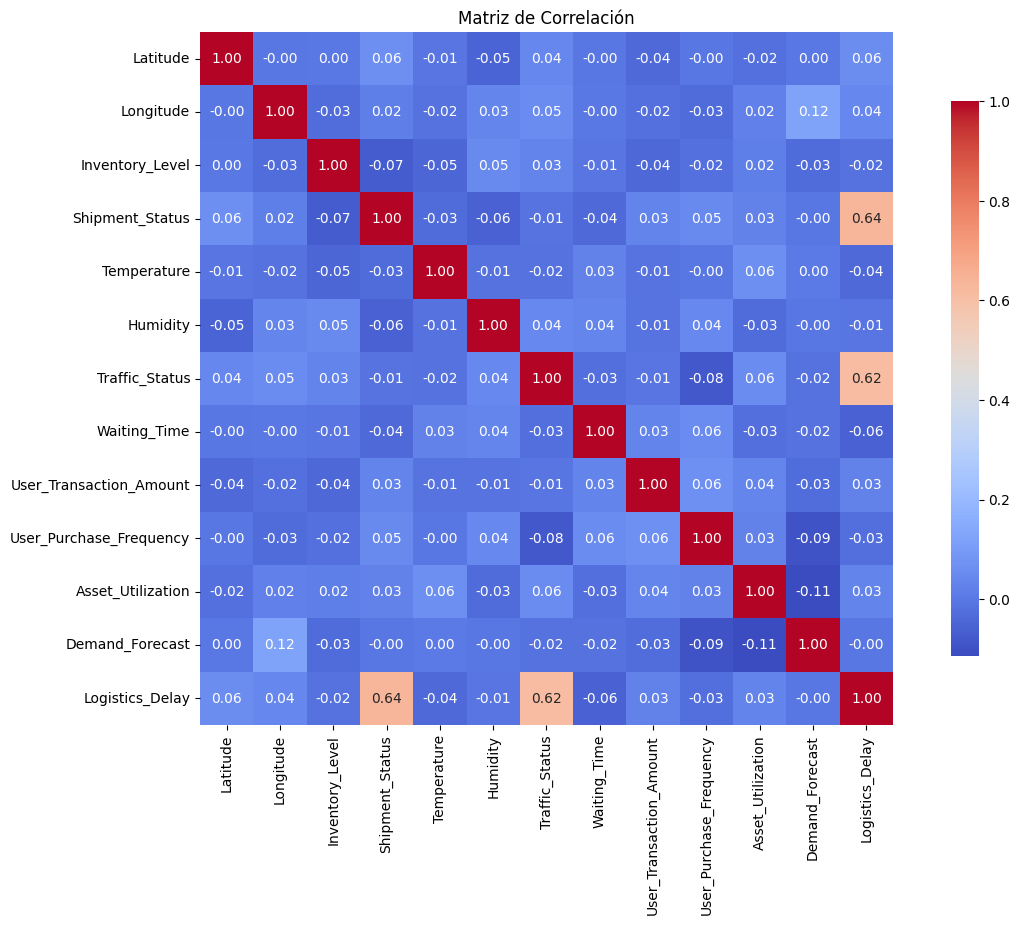

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlación = df.corr()
plt.figure(figsize = (15,9))
sns.heatmap(matriz_de_correlación, annot = True, cmap = 'coolwarm', fmt = "0.2f", square= True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de Correlación')
plt.show()


Coeficiente de determinación:  0.8074
Coeficiente de correlación:  0.6520
Ese coeficiente de correlación nos indica que el 65.20% tiene relación con la variable.
Podría ser posible que se pueda trazar una linea recta que pase a través de todos los puntos, pero se ven insuficientes por lo que sería una predicción ambigua.


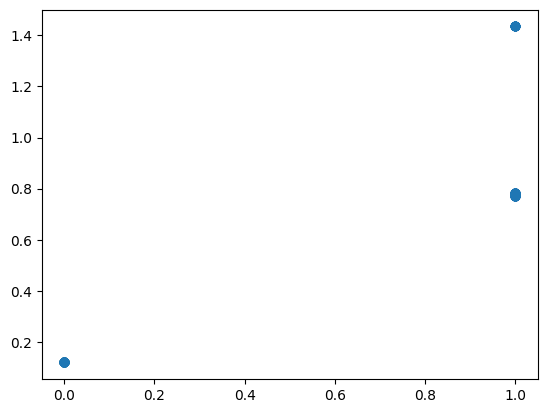

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
X =df[['Shipment_Status','Traffic_Status']]
Y = df['Logistics_Delay']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 42)
X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)
modelo = sm.OLS(Y_train, X_train_constante).fit()

Yc = modelo.predict(X_test_constante)
plt.scatter(Y_test,Yc)
r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}')
coeficiente_de_correlación = r2**2
print(f'Coeficiente de correlación: {coeficiente_de_correlación: 0.4f}')
print("Ese coeficiente de correlación nos indica que el 65.20% tiene relación con la variable.")
print('Podría ser posible que se pueda trazar una linea recta que pase a través de todos los puntos, pero se ven insuficientes por lo que sería una predicción ambigua.')

In [91]:
b0,b1,b2 = modelo.params
fun = lambda x1,x2: b0 + b1 * x1 + b2 * x2
fun(1, 0)

0.7811434399122075

In [92]:
from statsmodels.formula.api import ols
modelo_2 = ols('Logistics_Delay ~ Shipment_Status+Traffic_Status', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2, typ = 2)
tabla_anova

,sum_sq,df,F,PR(>F)
Shipment_Status,75.011339,1.0,1486.717993,1.268112e-178
Traffic_Status,70.291532,1.0,1393.171852,9.277710e-172
Residual,37.033468,734.0,NaN,NaN


In [93]:
print('El estado de envío("Sipment Status) se muestra con una correlación mayor, con un valor-p muy bajo.')
print('Es estado del trafico("Traffic Status") Tiene también un Correlación muy alta con la variable dependiente.')

El estado de envío("Sipment Status) se muestra con una correlación mayor, con un valor-p muy bajo.
Es estado del trafico("Traffic Status") Tiene también un Correlación muy alta con la variable dependiente.


In [94]:
'''
Timestamp, Se elimina esta variable por que no representa información relevante para el análisis.

Asset_ID, Se elimina esta variable por que no representa información relevante para el análisis.


Latitude, El histograma muestra una distribución multimodal, que indica un comportamiento irregular.

Longitude,  El histograma muestra una distribución multimodal, que indica un comportamiento irregular.


Inventory_Level, El histograma muestra una distribución multimodal, que indica una relación irregular.

Shipment_Status, Los niveles son In Transit y Delivered:0  y delayed:1

Temperature, El histograma muestra una distribución multimodal, lo que indica una relación irregular en la temperatura.

Humidity, El histograma muestra una distribución multimodal, lo que indica una relación irregular en la humedad.

Traffic_Status, Los niveles son detour y clear: 0, y heavy:1

Waiting_Time, Se muestra mayormente regular con algunos picos.

User_Transaction_Amount, Se muestra mayormente regular.

User_Purchase_Frequency, La distribución del histograma se muestra con picos más altos en los extremos y mas bajos en el centro,
lo que puede indicar que hay más frecuencia en pedidos más grandes o más pequeños.

Logistics_Delay_Reason, No se encontró relación relevante con la variable según la prueba de anova.

Asset_Utilization, Se muestra como una distribución multimodal, lo que indica una relación irregular.
Demand_Forecast, Se observan más picos en los extremos que en el centro.


Logistics_Delay
'''

'\nTimestamp, Se elimina esta variable por que no representa información relevante para el análisis.\n\nAsset_ID, Se elimina esta variable por que no representa información relevante para el análisis.\n\n\nLatitude, El histograma muestra una distribución multimodal, que indica un comportamiento irregular.\n\nLongitude,  El histograma muestra una distribución multimodal, que indica un comportamiento irregular.\n\n\nInventory_Level, El histograma muestra una distribución multimodal, que indica una relación irregular.\n\nShipment_Status, Los niveles son In Transit y Delivered:0  y delayed:1\n\nTemperature, El histograma muestra una distribución multimodal, lo que indica una relación irregular en la temperatura.\n\nHumidity, El histograma muestra una distribución multimodal, lo que indica una relación irregular en la humedad.\n\nTraffic_Status, Los niveles son detour y clear: 0, y heavy:1 \n\nWaiting_Time, Se muestra mayormente regular con algunos picos.\n\nUser_Transaction_Amount, Se mues